In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def load_data(datadir):
    img_array = []
    path = os.path.join(datadir)
    path_list = list(os.listdir(path))
    for img in path_list:
        img_array.append(cv2.imread(os.path.join(path, img)))
    return img_array

imgs_data_segmentacao = load_data('bd_size')
imgs_data_segmentacao_label = load_data('bd_size_out')

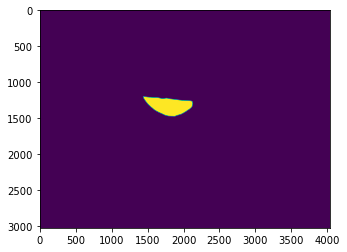

In [83]:
from skimage import filters
image = imgs_data_segmentacao[0]
#ret,thresh = cv2.threshold(img,127,255,0)

#im2,contours,hierarchy = cv2.findContours(thresh, 1, 2)
contours, hierarchy = cv2.findContours(label, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold = filters.threshold_otsu(img)
binarized_img = (img > threshold)*1
plt.imshow(label)   

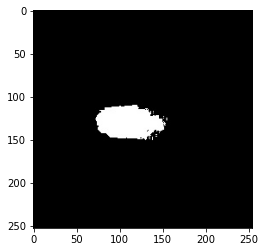

In [4]:
plt.imshow(imgs_data_segmentacao_label[2], cmap='gray')

In [87]:
mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv2.circle(mask, (260, 300), 225, (255,255,255), -1) 
replacedImage = cv2.bitwise_and(image, mask)

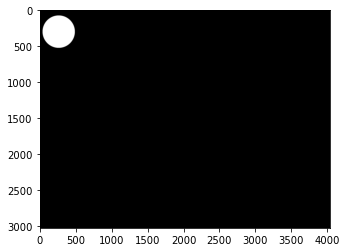

In [89]:
plt.imshow(mask)   

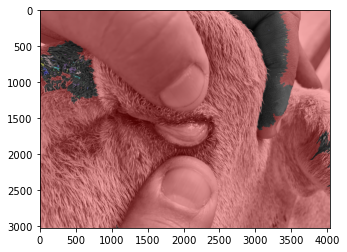

In [23]:
from skimage.filters import sobel
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.color import label2rgb
def cresc_reg(image):
    imgs_seg1 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    elevation_map = sobel(imgs_seg1)

    markers = np.zeros_like(imgs_seg1)
    markers[imgs_seg1 < 30] = 1
    markers[imgs_seg1 > 150] = 2

    segmentation = watershed(elevation_map, markers)

    segmentation = ndi.binary_fill_holes(segmentation - 1)
    labeled_coins, _ = ndi.label(segmentation)
    image_label_overlay = label2rgb(labeled_coins, image=imgs_seg1)

    return image_label_overlay

teste = cresc_reg(imgs_data_segmentacao[1])
plt.imshow(teste)   

(3024, 4032, 3)


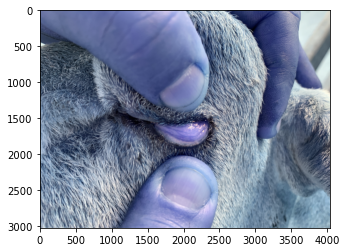

In [53]:
mask = np.zeros(img.shape[:2], np.uint8)
'''for i in img:
    for j in range(len(i)):
        #print(i)
        print(i[j])
    #print(len(i))
    #print(i[20])
    
print(len(img))
'''

img.shape
print(img.shape)
img[200,200] = [255, 255, 255]
plt.imshow(img)

for i in range(3024):
    

In [38]:
# import required libraries
import cv2
import numpy as np

# Read an input image as a gray image
img = imgs_data_segmentacao[1]

# create a mask
#mask = np.zeros(img.shape[:2], np.uint8)
#mask[100:250, 150:450] = 255
mask = img
# compute the bitwise AND using the mask
masked_img = cv2.bitwise_and(img,img,mask = mask)

# display the mask, and the output image
cv2.imshow('Mask',mask)
cv2.waitKey(0)
cv2.imshow('Masked Image',masked_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

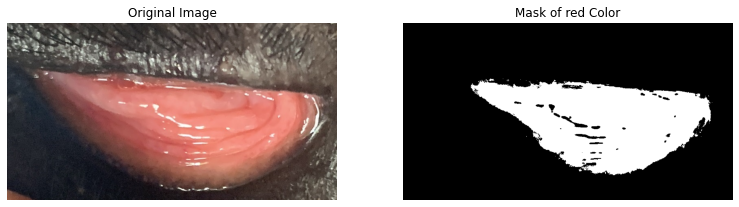

In [86]:
import cv2
import numpy as np
 
image = imgs_data_segmentacao[4] 
# Converting the image to hsv
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# define range of red color in HSV
lower_red = np.array([0,75,180])
upper_red = np.array([255,255,255])
     
# Threshold the HSV image using inRange function to get only red colors
mask = cv2.inRange(hsv, lower_red, upper_red)
 
plt.figure(figsize=[13,13])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 12});plt.axis('off');
plt.subplot(122);plt.imshow(mask, cmap='gray');plt.title("Mask of red Color",fontdict={'fontsize': 12});plt.axis('off');


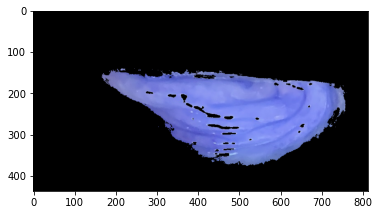

In [87]:
replacedImage = cv2.bitwise_and(image,image,mask=mask)
plt.imshow(replacedImage)

In [61]:
# import required libraries
import cv2
import numpy as np

# read input image
img = imgs_data_segmentacao[0]

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
#lower_yellow = np.array([0,50,180])
#upper_yellow = np.array([195,255,255])

#lower_yellow = np.array([0,50,180])
#upper_yellow = np.array([255,255,255])

lower_yellow= np.array([0,50,180])
upper_yellow= np.array([255,255,255])

# Create a mask. Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Bitwise-AND mask and original image
result = cv2.bitwise_and(img,img, mask= mask)

# display the mask and masked image
cv2.imshow('Mask',mask)
cv2.waitKey(0)
cv2.imshow('Masked Image',result)
cv2.waitKey(0)
cv2.destroyAllWindows()

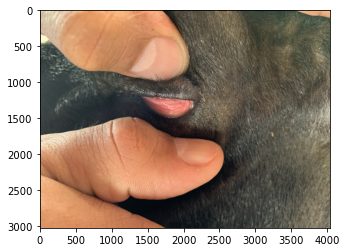

In [27]:
image = cv2.cvtColor(imgs_data_segmentacao[1], cv2.COLOR_BGR2RGB)
plt.imshow(image)

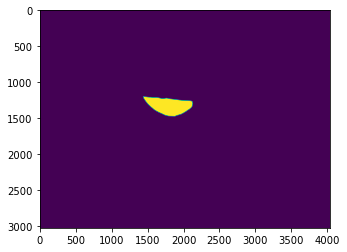

In [32]:
label = cv2.cvtColor(imgs_data_segmentacao_label[1], cv2.COLOR_BGR2GRAY)
plt.imshow(label)
label = label > 127
label = (label * 255).astype(np.uint8)

In [34]:
replacedImage = cv2.bitwise_and(image, image, mask=label)

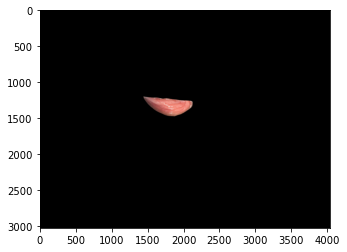

In [35]:
plt.imshow(replacedImage)

In [60]:
contours, hierarchy = cv2.findContours(label, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
def getGreaterArea(contours):
    arealist = []
    for index in contours:
        area = cv2.contourArea(index)
        arealist.append(area)
    return arealist.index(max(arealist))
index = getGreaterArea(contours)

In [44]:
def segmentationROI(imgOri, Mask, cnt, index):
    #((x_center,y_center)(Width, Height),angle [info: https://namkeenman.wordpress.com/tag/minarearect/])
    rect = cv2.minAreaRect(cnt[index]) 
    #Creation windows for crop return 4 location (x,y), int convert 
    box = np.int0(cv2.boxPoints(rect))
                
    W = rect[1][0] 
    H = rect[1][1]

    #Separating locations    
    Xs = [i[0] for i in box]
    Ys = [i[1] for i in box]

    x1 = min(Xs)
    x2 = max(Xs)
    y1 = min(Ys)
    y2 = max(Ys)

    rotated = False
    angle = rect[2]

    if angle < -45:
        angle+=90
        rotated = True

    center = (int(rect[0][0]), int(rect[0][1]))
    size = (int(x2-x1),int(y2-y1))

    M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

    cropped = cv2.getRectSubPix(imgOri, size, center)    
    cropped = cv2.warpAffine(cropped, M, size)

    croppedMask = cv2.getRectSubPix(Mask, size, center)    
    croppedMask = cv2.warpAffine(croppedMask, M, size)

    croppedW = W if not rotated else H 
    croppedH = H if not rotated else W

    croppedRotated = cv2.getRectSubPix(cropped, (int(croppedW), int(croppedH)), (size[0]/2, size[1]/2))
    croppedRotatedMask = cv2.getRectSubPix(croppedMask, (int(croppedW), int(croppedH)), (size[0]/2, size[1]/2))

    return croppedRotated, croppedRotatedMask
croppedRotated, croppedRotatedMask = segmentationROI(replacedImage, label, contours, index)

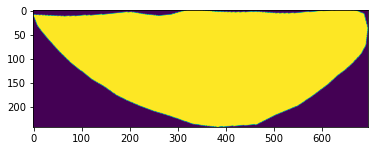

In [46]:
plt.imshow(croppedRotatedMask)

In [15]:
height, width, value = img.shape
print(height)

print(img.shape)

3024
(3024, 4032, 3)


In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
import argparse

def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print('Start Mouse Position: ' + str(x) + ', ' + str(y))
        s_box = x, y
        boxes.append(s_box)


def region_growing(img, seed):
    #Parameters for region growing
    neighbors = [(-1,8, 0), (1,8, 0), (0, -1,8), (0, 1,8)]
    region_threshold = 0.2 #20 é melhor
    region_size = 1
    intensity_difference = 0
    neighbor_points_list = []
    neighbor_intensity_list = []

    #Mean of the segmented region
    region_mean = img[seed]

    #Input image parameters
    height, width, value = img.shape
    image_size = height * width

    #Initialize segmented output image
    segmented_img = np.zeros((height, width, 1), np.uint8)

    #Region growing until intensity difference becomes greater than certain threshold
    while (intensity_difference < region_threshold) & (region_size < image_size):
        #Loop through neighbor pixels
        for i in range(4):
            #Compute the neighbor pixel position
            x_new = seed[0] + neighbors[i][0]
            y_new = seed[1] + neighbors[i][1]

            #Boundary Condition - check if the coordinates are inside the image
            check_inside = (x_new >= 0) & (y_new >= 0) & (x_new < height) & (y_new < width)

            #Add neighbor if inside and not already in segmented_img
            if check_inside:
                if segmented_img[x_new, y_new] == 0:
                    neighbor_points_list.append([x_new, y_new])
                    neighbor_intensity_list.append(img[x_new, y_new])
                    segmented_img[x_new, y_new] = 255

        #Add pixel with intensity nearest to the mean to the region
        
        distance = abs(neighbor_intensity_list-region_mean)
        #print(distance)
        #print(min(distance[0]))
        dist = []
        dist = [min(distance[0]), min(distance[1]), min(distance[2]), min(distance[3])]
        #print(dist)                                                               
        
        pixel_distance = min(dist)
        index = np.where(distance == pixel_distance)[0][0]
        segmented_img[seed[0], seed[1]] = 255
        region_size += 1

        #New region mean
        region_mean = (region_mean*region_size + neighbor_intensity_list[index])/(region_size+1)

        #Update the seed value
        seed = neighbor_points_list[index]
        #Remove the value from the neighborhood lists
        neighbor_intensity_list[index] = neighbor_intensity_list[-1]
        neighbor_points_list[index] = neighbor_points_list[-1]

    return segmented_img


if __name__ == '__main__':

    boxes = []
    filename = ('RES2.jpg')
    img = imgs_data_segmentacao[2] #cv2.imread(filename, 0)
    resized = cv2.resize(img,(256,256))
    cv2.namedWindow('input')
    cv2.setMouseCallback('input', on_mouse, 0,)
    cv2.imshow('input', resized)
    cv2.waitKey()
    print('Starting region growing based on last click')
    seed = boxes[-1]
    print(seed)
    cv2.imshow('input', region_growing(resized, seed))
    print('Done. Showing output now')
    cv2.imwrite("seg12.jpg",region_growing(resized, seed))
    cv2.waitKey()
    cv2.destroyAllWindows()



Start Mouse Position: 115, 116
Starting region growing based on last click
(115, 116)
Done. Showing output now


In [3]:
label = cv2.cvtColor(imgs_data_segmentacao_label[2], cv2.COLOR_BGR2GRAY)
cv2.imshow('label',label)
label = label > 127
label = (label * 255).astype(np.uint8)


In [1]:
label = cv2.cvtColor(label, cv2.COLOR_BGR2GRAY)
plt.imshow('teste', label)

NameError: name 'cv2' is not defined

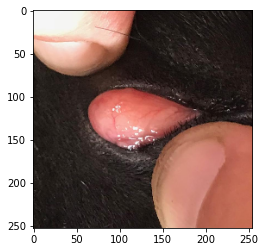

In [14]:
img = cv2.resize(imgs_data_segmentacao[5],(255,253))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [12]:
replacedImage = masked_img = cv2.bitwise_and(img,img, mask = label)

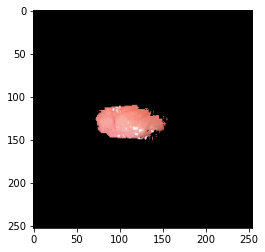

In [13]:
#plt.imshow(replacedImage)

replacedImage = cv2.cvtColor(replacedImage, cv2.COLOR_BGR2RGB)
plt.imshow(replacedImage)